In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
os.getcwd()

'/Users/user/Documents/GitHub/normet/tutorials'

In [3]:
os.chdir('../')

In [34]:
#date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M:%S')
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])

In [5]:
import normet.autodew as ad

In [6]:
#from normet.autodew import do_all

In [7]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [8]:
date_start = time.time()
df_dew,modstat=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=1000,fraction=0.75)
date_post_training = time.time()
date_post_training-date_start

126.69858932495117

<Axes: xlabel='date'>

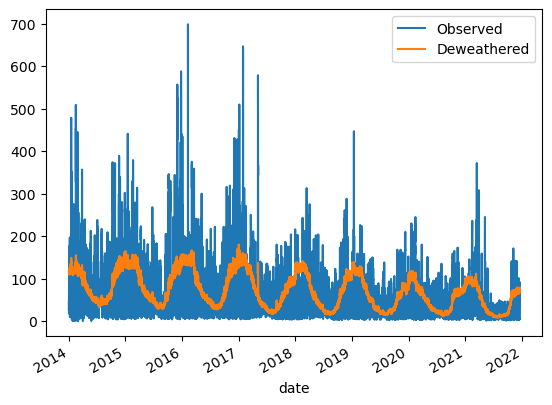

In [9]:
df_dew.plot()

In [10]:
df_dew1,modstat1=ad.do_all_unc(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,n_models=10)

In [32]:
modstat1[modstat1['set']=='testing'].sort_values('R2').iloc[-1,:]

n               5800
FAC2         0.86069
MB          0.303674
MGE        16.942896
NMB         0.005362
NMGE        0.299139
RMSE       28.558919
r           0.881657
p_Value          0.0
COE         0.596872
IOA         0.798436
R2          0.777319
set          testing
seed          120727
Name: 0, dtype: object

In [36]:
df_dew,modstat=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=30,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75,seed=120727)

In [37]:
modstat

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_Value,COE,IOA,R2,set
0,5800,0.860690,0.303674,16.942896,5.361582e-03,0.299139,28.558919,0.881657,0.0,0.596872,0.798436,0.777319,testing
0,17398,0.999138,-0.000006,0.767159,-1.116355e-07,0.013580,1.029465,0.999867,0.0,0.981714,0.990857,0.999733,training
0,23198,0.964523,0.075920,4.811442,1.343010e-03,0.085113,14.307878,0.971761,0.0,0.885367,0.942683,0.944320,all


<Axes: xlabel='date'>

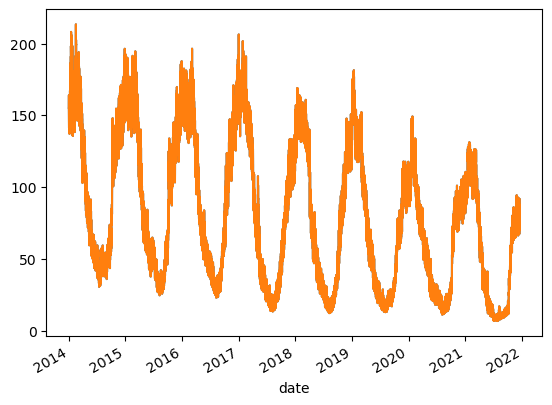

In [39]:
df_dew1['Deweathered_120727'].plot()
df_dew['Deweathered'].plot()

<Axes: xlabel='date'>

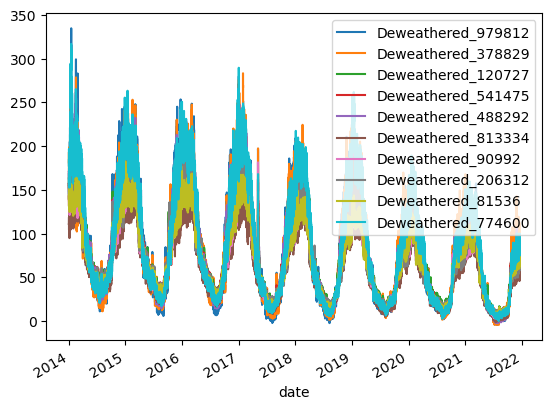

In [13]:
df_dew1.iloc[:,1:11].plot()

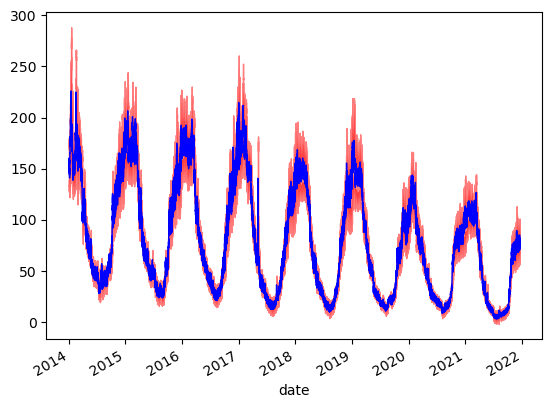

In [22]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
df_dew1['mean'].plot(c='b',lw=1)
ax.fill_between(df_dew1.index,df_dew1['mean']-df_dew1['std'],df_dew1['mean']+df_dew1['std'],color='r',alpha=0.5)
#df_dew1['median'].plot()

In [23]:
df=pd.read_excel(r'./normet/datasets/Deweather/testdata.xlsx',parse_dates=['date'])
df=ad.prepare_data(df, value='PM2.5', split_method = 'random',na_rm=False, replace=False, fraction=0.75)

In [24]:
df.head()

,rowid,date,ssr,tp,blh,tcc,sp,ws,wd,air_temp,...,PM10,value,Ox,Lunar_monthday,day,date_unix,day_julian,weekday,hour,set
0,0,2014-01-01 08:00:00,1.136630e+04,0.0,22.416888,0.0,100193.701618,4.666667,278.654722,6.000000,...,118.416667,45.166667,42.563856,12&1,1,1.388563e+09,1,3,8,testing
1,1,2014-01-01 11:00:00,1.098169e+06,0.0,1036.592302,0.0,100372.404415,6.000000,291.603066,9.400000,...,78.250000,28.000000,43.898884,12&1,1,1.388574e+09,1,3,11,training
2,2,2014-01-01 14:00:00,1.255284e+06,0.0,1653.530020,0.0,100216.797030,6.333333,292.695419,11.300000,...,58.250000,23.166667,43.964922,12&1,1,1.388585e+09,1,3,14,testing
3,3,2014-01-01 17:00:00,1.306076e+05,0.0,40.497319,0.0,100307.868299,3.333333,275.963757,9.366667,...,68.583333,23.833333,44.421830,12&1,1,1.388596e+09,1,3,17,testing
4,4,2014-01-01 20:00:00,0.000000e+00,0.0,19.378160,0.0,100514.007135,1.000000,180.000000,2.600000,...,133.916667,59.750000,52.910328,12&1,1,1.388606e+09,1,3,20,training


In [25]:
automl=ad.train_model(df,variables=all_features,
                time_budget= 120,  metric= 'r2', estimator_list=['lgbm'],task= 'regression', seed= 7654321);

In [26]:
date_start = time.time()
df_dew = ad.normalise(automl, df, 
                           feature_names = all_features,
                          variables= ['ws','wd', 'air_temp', 'atmos_pres', 'dew_point', 'RH','blh'],
                          n_samples=1000)
date_post_training = time.time()
date_post_training-date_start

68.75212621688843

<Axes: xlabel='date'>

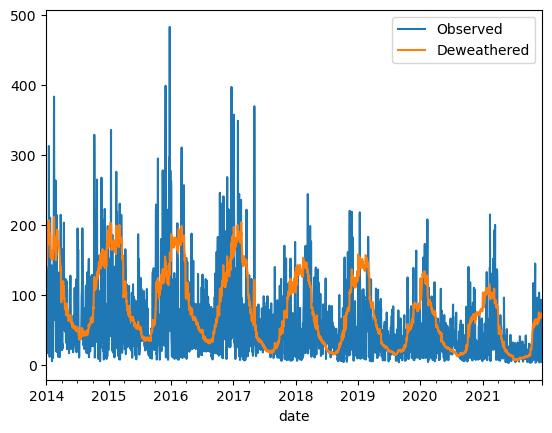

In [27]:
df_dew.resample('1d').mean().plot()

In [28]:
df_dew

,Observed,Deweathered
date,,
2014-01-01 08:00:00,45.166667,140.708409
2014-01-01 11:00:00,28.000000,140.172921
2014-01-01 14:00:00,23.166667,135.153650
2014-01-01 17:00:00,23.833333,135.720682
2014-01-01 20:00:00,59.750000,139.327507
...,...,...
2021-12-17 02:00:00,5.000000,71.082794
2021-12-17 05:00:00,4.000000,68.570653
2021-12-17 08:00:00,5.000000,69.450314


In [26]:
ad.modStats(df,set='testing')

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_Value,COE,IOA,R2,set
0,5800,0.827241,0.087022,17.710534,0.001559,0.317202,30.786963,0.859379,0.0,0.573298,0.786649,0.738532,testing


In [16]:
import normet.pdp as pdp

In [17]:
pdp_value=pdp.pdp_all(automl,df,feature_names=all_features)

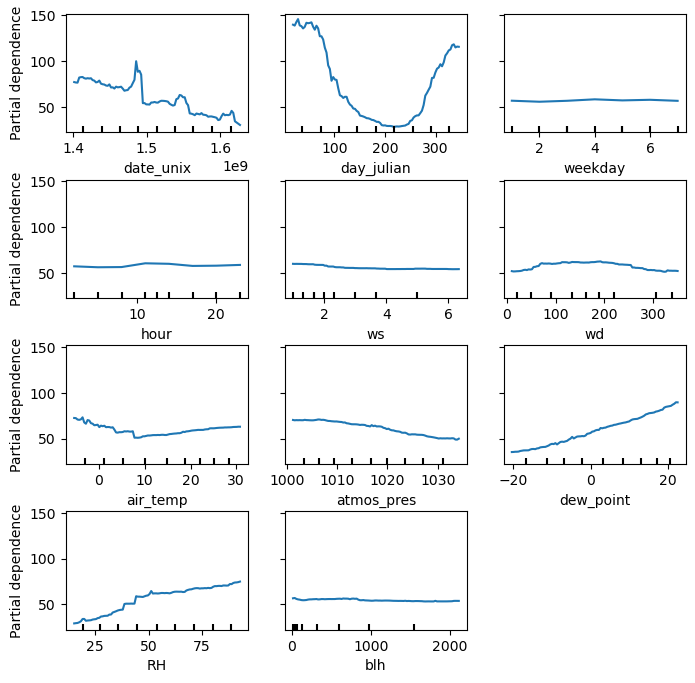

In [18]:
pdp.pdp_plot(automl, df, feature_names=all_features,figsize=(8,8),hspace=0.4)

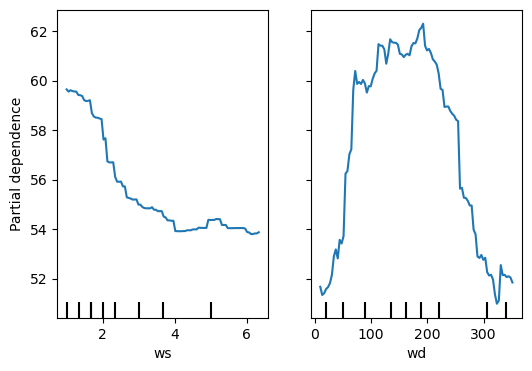

In [19]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['ws','wd'],kind='average',figsize=(6,4))

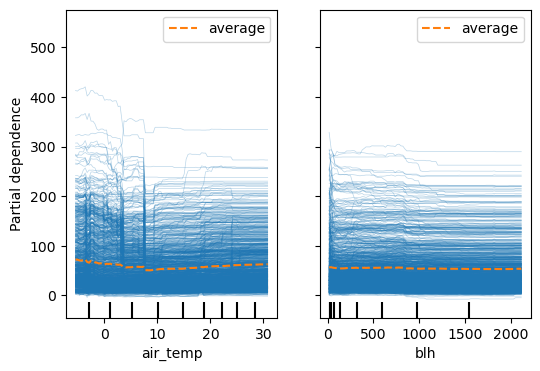

In [20]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['air_temp','blh'],kind='both',figsize=(6,4))

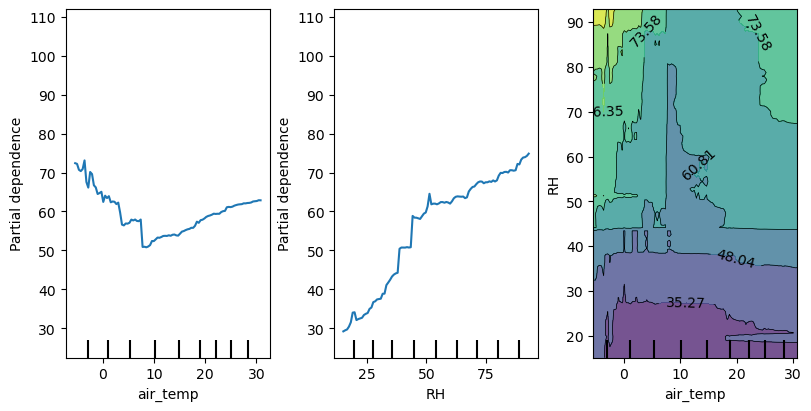

In [21]:
pdp.pdp_interaction(automl,df,variables=['air_temp','RH',('air_temp','RH')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

/Users/user/Documents/GitHub/normet/normet/pdp.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,cat_col]=codes


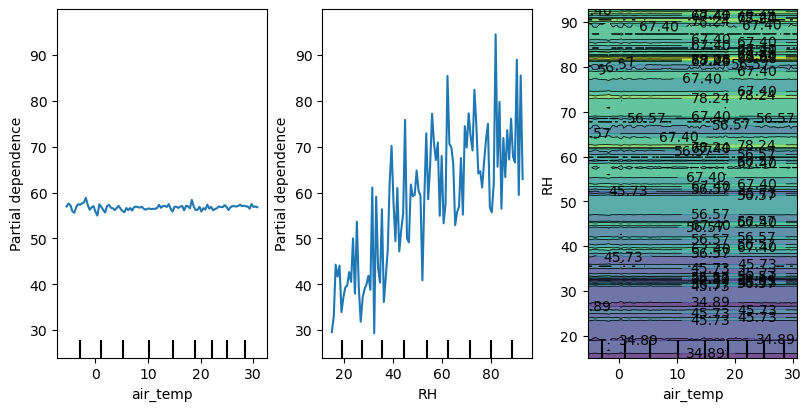

In [22]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','RH',('air_temp','RH')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

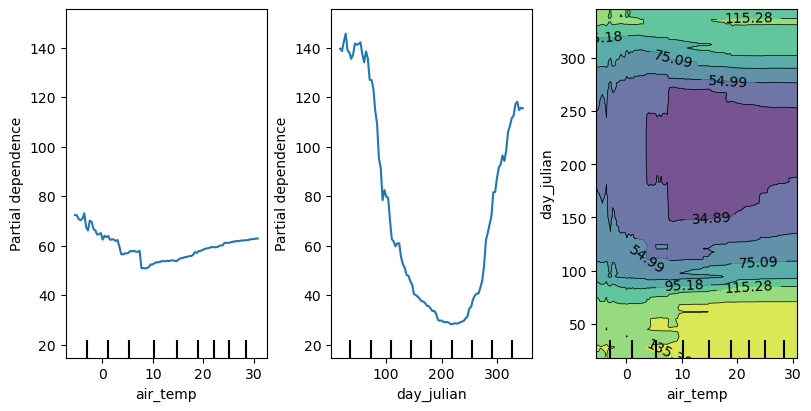

In [23]:
pdp.pdp_interaction(automl,df,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

/Users/user/Documents/GitHub/normet/normet/pdp.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,cat_col]=codes


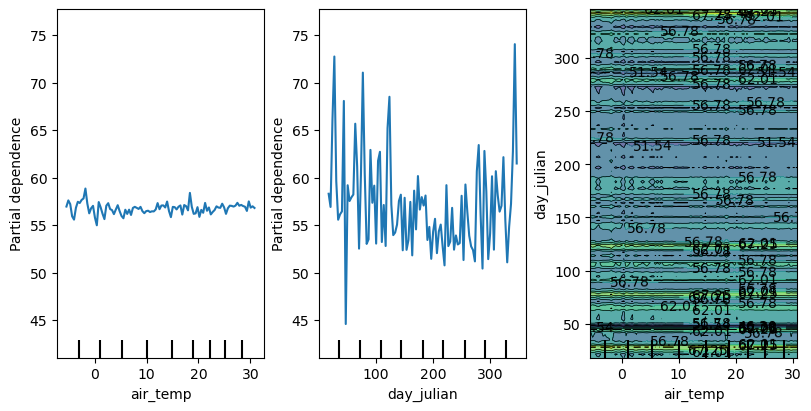

In [24]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)